In [1]:
import nltk
from nltk.util import ngrams
import re
from nltk.tokenize import sent_tokenize
from nltk import load

In [2]:
# return all the 'adj + noum' twograms
def getAdjNoumTwograms(terms,adj,noum):

    result=[]

    twograms = ngrams(terms,2) #compute 2-grams
    
    #for each 2gram
    for tg in twograms:  
        if tg[0] in adj and tg[1] in noum: # if the 2gram is a an adverb followed by an adjective
             result.append(tg)
   
    return result

In [10]:
# return all the terms that belong to a specific POS type
def getPOSterms(terms,POStags,tagger):

    tagged_terms=tagger.tag(terms)#do POS tagging on the tokenized sentence

    POSterms={}
    for tag in POStags:POSterms[tag]=list()

    #for each tagged term
    for pair in tagged_terms:
        for tag in POStags: # for each POS tag 
            if pair[1].startswith(tag): POSterms[tag].append(pair[0])

    return POSterms

In [11]:
def run(fpath):

    #make a new tagger
    _POS_TAGGER = 'taggers/maxent_treebank_pos_tagger/english.pickle'
    tagger = load(_POS_TAGGER)

    #read the input
    f=open(fpath)
    text=f.read().strip()
    f.close()

    #split sentences
    sentences=sent_tokenize(text)
    print ('NUMBER OF SENTENCES: ',len(sentences))

    NoumAfterAdj=[]

    # for each sentence
    for sentence in sentences:

        sentence=re.sub('[^a-zA-Z\d]',' ',sentence)#replace chars that are not letters or numbers with a spac
        sentence=re.sub(' +',' ',sentence).strip()#remove duplicate spaces

        #tokenize the sentence
        terms = nltk.word_tokenize(sentence.lower())   

        POStags=['JJ','NN'] # POS tags of interest 
        POSterms=getPOSterms(terms,POStags,tagger)

        adjectives=POSterms['JJ']
        noums=POSterms['NN']

        #get the results for this sentence 
        NoumAfterAdj+=getAdjNoumTwograms(terms, adjectives, noums)

    return NoumAfterAdj

In [12]:
FourSquare_review = run('FourSquareReviews.txt')
FourSquare_review

NUMBER OF SENTENCES:  37


[('little', 'hobo'),
 ('great', 'place'),
 ('maple', 'syrup'),
 ('hot', 'girl'),
 ('other', 'goodness'),
 ('awful', 'service'),
 ('new', 'salads'),
 ('yummy', 'august'),
 ('new', 'menu'),
 ('breakfast', 'place'),
 ('elysian', 'madison'),
 ('easy', 'eggs'),
 ('worst', 'coffees'),
 ('rough', 'march'),
 ('breakfast', 'tacos')]

In [13]:
Google_review = run('Google_Facebook_Review.txt')
Google_review

NUMBER OF SENTENCES:  166


[('past', 'year'),
 ('great', 'deal'),
 ('great', 'food'),
 ('small', 'location'),
 ('fresh', 'made'),
 ('delicious', 'hearty'),
 ('t', 'recommend'),
 ('private', 'event'),
 ('new', 'year'),
 ('t', 'want'),
 ('nice', 'people'),
 ('new', 'year'),
 ('better', 'place'),
 ('large', 'brunch'),
 ('large', 'dish'),
 ('breakfast', 'tacos'),
 ('hard', 'day'),
 ('quick', 'service'),
 ('great', 'place'),
 ('runnier', 'tho'),
 ('t', 'know'),
 ('best', 'taste'),
 ('fried', 'chicken'),
 ('normal', 'sweet'),
 ('little', 'cafe'),
 ('many', 'mom'),
 ('great', 'weekend'),
 ('fresh', 'flowers'),
 ('adorable', 'touch'),
 ('huge', 'nutella'),
 ('great', 'quality'),
 ('great', 'value'),
 ('extra', 'kudos'),
 ('good', 'prices'),
 ('great', 'food'),
 ('nice', 'atmosphere'),
 ('good', 'food'),
 ('plentiful', 'prices'),
 ('little', 'steep'),
 ('delicious', 'excellent'),
 ('good', 'service'),
 ('oatmeal', 'something'),
 ('small', 'bowl'),
 ('fresh', 'fruit'),
 ('cozy', 'place'),
 ('good', 'taste'),
 ('solid', 'b

In [14]:
Yelp_review_1 = run('Yelp data.txt')
Yelp_review_1

NUMBER OF SENTENCES:  768


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: generator 'ngrams' raised StopIteration
  if __name__ == '__main__':


[('past', 'saturday'),
 ('male', 'waiter'),
 ('good', 'experience'),
 ('table', 'outside'),
 ('open', 'inside'),
 ('additional', 'wait'),
 ('recent', 'experience'),
 ('awful', 'lunch'),
 ('first', 'time'),
 ('busy', 'lunch'),
 ('whole', 'experience'),
 ('awful', 'service'),
 ('terrible', 'food'),
 ('cozy', 'coffee'),
 ('poor', 'reviews'),
 ('enormous', 'waits'),
 ('negative', 'star'),
 ('worst', 'service'),
 ('mediocre', 'food'),
 ('vegetarian', 'migas'),
 ('luscious', 'j'),
 ('best', 'pancakes'),
 ('cute', 'place'),
 ('black', 'beans'),
 ('better', 'place'),
 ('special', 'night'),
 ('main', 'dish'),
 ('favorite', 'dishes'),
 ('best', 'steak'),
 ('friendliest', 'restaurant'),
 ('other', 'people'),
 ('wonderful', 'evening'),
 ('only', 'customer'),
 ('little', 'place'),
 ('little', 'discrete'),
 ('few', 'points'),
 ('worth', 'checking'),
 ('young', 'son'),
 ('t', 'know'),
 ('bad', 'luck'),
 ('delicious', 'food'),
 ('delicious', 'chipotle'),
 ('large', 'portions'),
 ('great', 'brunch'),
 

In [15]:
Yelp_review_2 = run('yelp_liyu ma.txt')
Yelp_review_2

NUMBER OF SENTENCES:  908


[('new', 'additions'),
 ('basic', 'dreams'),
 ('absolute', 'worst'),
 ('biggest', 'mistake'),
 ('thin', 'layer'),
 ('disappointing', 'today'),
 ('tight', 'travel'),
 ('quiet', 'morning'),
 ('new', 'management'),
 ('whole', 'milk'),
 ('funny', 'thing'),
 ('try', 'again'),
 ('late', 'cold'),
 ('chocolate', 'chip'),
 ('second', 'time'),
 ('last', 'time'),
 ('disappointing', 'breakfast'),
 ('nice', 'place'),
 ('t', 'know'),
 ('great', 'brunch'),
 ('fresh', 'fruit'),
 ('comfortable', 'chairs'),
 ('great', 'brunch'),
 ('frantic', 'maybe'),
 ('bad', 'reviews'),
 ('good', 'effort'),
 ('desperate', 'occasions'),
 ('great', 'selection'),
 ('available', 'carmelo'),
 ('first', 'time'),
 ('poached', 'egg'),
 ('more', 'syrup'),
 ('good', 'food'),
 ('slow', 'service'),
 ('better', 'brunch'),
 ('better', 'places'),
 ('busy', 'day'),
 ('table', 'inside'),
 ('first', 'thing'),
 ('classic', 'egg'),
 ('alternative', 'choice'),
 ('sanitary', 'report'),
 ('nyc', 's'),
 ('nice', 'store'),
 ('expensive', 'con

In [16]:
print("The type of FourSquare_review", type(FourSquare_review))
print("The type of Google_review", type(Google_review))
print("The type of Yelp_review_1", type(Yelp_review_1))
print("The type of Yelp_review_2", type(Yelp_review_2))

The type of FourSquare_review <class 'list'>
The type of Google_review <class 'list'>
The type of Yelp_review_1 <class 'list'>
The type of Yelp_review_2 <class 'list'>


In [17]:
my_review = FourSquare_review+Google_review+Yelp_review_1+Yelp_review_2
print("the length of my_review", len(my_review))
print(my_review)

the length of my_review 1000
[('little', 'hobo'), ('great', 'place'), ('maple', 'syrup'), ('hot', 'girl'), ('other', 'goodness'), ('awful', 'service'), ('new', 'salads'), ('yummy', 'august'), ('new', 'menu'), ('breakfast', 'place'), ('elysian', 'madison'), ('easy', 'eggs'), ('worst', 'coffees'), ('rough', 'march'), ('breakfast', 'tacos'), ('past', 'year'), ('great', 'deal'), ('great', 'food'), ('small', 'location'), ('fresh', 'made'), ('delicious', 'hearty'), ('t', 'recommend'), ('private', 'event'), ('new', 'year'), ('t', 'want'), ('nice', 'people'), ('new', 'year'), ('better', 'place'), ('large', 'brunch'), ('large', 'dish'), ('breakfast', 'tacos'), ('hard', 'day'), ('quick', 'service'), ('great', 'place'), ('runnier', 'tho'), ('t', 'know'), ('best', 'taste'), ('fried', 'chicken'), ('normal', 'sweet'), ('little', 'cafe'), ('many', 'mom'), ('great', 'weekend'), ('fresh', 'flowers'), ('adorable', 'touch'), ('huge', 'nutella'), ('great', 'quality'), ('great', 'value'), ('extra', 'kudos'

In [20]:
#### count the frequence 

import collections

counter=collections.Counter(my_review)
counter

Counter({('4th', 'compliment'): 1,
         ('absolute', 'worst'): 2,
         ('actual', 'bite'): 1,
         ('actual', 'gourmet'): 1,
         ('actual', 'service'): 1,
         ('additional', 'customer'): 1,
         ('additional', 'jalapenos'): 1,
         ('additional', 'wait'): 1,
         ('adequate', 'restaurant'): 1,
         ('adorable', 'congratulations'): 1,
         ('adorable', 'inside'): 1,
         ('adorable', 'touch'): 1,
         ('affordable', 'option'): 1,
         ('al', 'fresco'): 1,
         ('alcoholic', 'drinks'): 1,
         ('alternative', 'choice'): 1,
         ('american', 'staples'): 1,
         ('ample', 'outdoor'): 1,
         ('ample', 'selection'): 1,
         ('andre', 'n'): 1,
         ('answer', 'go'): 1,
         ('attentitive', 'staff'): 1,
         ('attentive', 'staff'): 2,
         ('attractive', 'place'): 1,
         ('attractive', 'servers'): 1,
         ('available', 'carmelo'): 1,
         ('available', 'restaurants'): 1,
         ('avera

In [21]:
top_100_review = counter.most_common(100)
top_100_review

[(('first', 'time'), 12),
 (('french', 'toast'), 10),
 (('good', 'food'), 8),
 (('last', 'time'), 8),
 (('great', 'place'), 7),
 (('breakfast', 'tacos'), 6),
 (('t', 'know'), 6),
 (('black', 'beans'), 6),
 (('great', 'food'), 5),
 (('next', 'time'), 5),
 (('several', 'times'), 5),
 (('few', 'times'), 5),
 (('t', 'recommend'), 4),
 (('fresh', 'fruit'), 4),
 (('white', 'people'), 4),
 (('good', 'time'), 4),
 (('cute', 'place'), 4),
 (('great', 'brunch'), 4),
 (('small', 'place'), 4),
 (('new', 'year'), 3),
 (('good', 'service'), 3),
 (('delicious', 'food'), 3),
 (('whole', 'place'), 3),
 (('long', 'time'), 3),
 (('many', 'times'), 3),
 (('fresh', 'ingredients'), 3),
 (('bad', 'reviews'), 3),
 (('last', 'weekend'), 3),
 (('second', 'time'), 3),
 (('english', 'muffin'), 3),
 (('large', 'group'), 3),
 (('other', 'options'), 3),
 (('slow', 'service'), 3),
 (('last', 'night'), 3),
 (('same', 'time'), 3),
 (('top', 'notch'), 3),
 (('don', 't'), 3),
 (('awful', 'service'), 2),
 (('easy', 'eggs'

In [30]:
import pandas as pd
my_data = pd.DataFrame(my_review)
my_data.columns = ['adj', 'noum']
my_data

,adj,noum
0,little,hobo
1,great,place
2,maple,syrup
3,hot,girl
4,other,goodness
5,awful,service
6,new,salads
7,yummy,august
8,new,menu
9,breakfast,place


In [57]:
my_data['two_word'] = my_data['adj'] + '_' + my_data['noum']
my_data.head()

,adj,noum,two_word
0,little,hobo,little_hobo
1,great,place,great_place
2,maple,syrup,maple_syrup
3,hot,girl,hot_girl
4,other,goodness,other_goodness


In [58]:
two_word_string = my_data['two_word'].astype(str)
two_word_string

0             little_hobo
1             great_place
2             maple_syrup
3                hot_girl
4          other_goodness
5           awful_service
6              new_salads
7            yummy_august
8                new_menu
9         breakfast_place
10        elysian_madison
11              easy_eggs
12          worst_coffees
13            rough_march
14        breakfast_tacos
15              past_year
16             great_deal
17             great_food
18         small_location
19             fresh_made
20       delicious_hearty
21            t_recommend
22          private_event
23               new_year
24                 t_want
25            nice_people
26               new_year
27           better_place
28           large_brunch
29             large_dish
              ...        
970    comfortable_dining
971        little_morning
972           poor_result
973          last_weekend
974            nice_table
975              good_job
976        average_brunch
977        b

In [59]:
import numpy as np
s = np.array(two_word_string)
s1 = '   '.join(s)
s1

'little_hobo   great_place   maple_syrup   hot_girl   other_goodness   awful_service   new_salads   yummy_august   new_menu   breakfast_place   elysian_madison   easy_eggs   worst_coffees   rough_march   breakfast_tacos   past_year   great_deal   great_food   small_location   fresh_made   delicious_hearty   t_recommend   private_event   new_year   t_want   nice_people   new_year   better_place   large_brunch   large_dish   breakfast_tacos   hard_day   quick_service   great_place   runnier_tho   t_know   best_taste   fried_chicken   normal_sweet   little_cafe   many_mom   great_weekend   fresh_flowers   adorable_touch   huge_nutella   great_quality   great_value   extra_kudos   good_prices   great_food   nice_atmosphere   good_food   plentiful_prices   little_steep   delicious_excellent   good_service   oatmeal_something   small_bowl   fresh_fruit   cozy_place   good_taste   solid_brunch   fantastic_breakfasts   great_brunches   real_homemade   best_bagel   provencal_mango   italian_veg

In [28]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
import os
os.path
!pip install wordcloud

  Using cached wordcloud-1.3.1.tar.gz
  Running setup.py bdist_wheel for wordcloud: started
  Running setup.py bdist_wheel for wordcloud: finished with status 'done'
  Stored in directory: C:\Users\ylwan\AppData\Local\pip\Cache\wheels\d9\4c\ac\e63c45f2ce09860e9459a410953039c30296e89d9f7234675f
Successfully built wordcloud


In [26]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [55]:
mpl.rcParams['figure.figsize']=(16.0,16.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

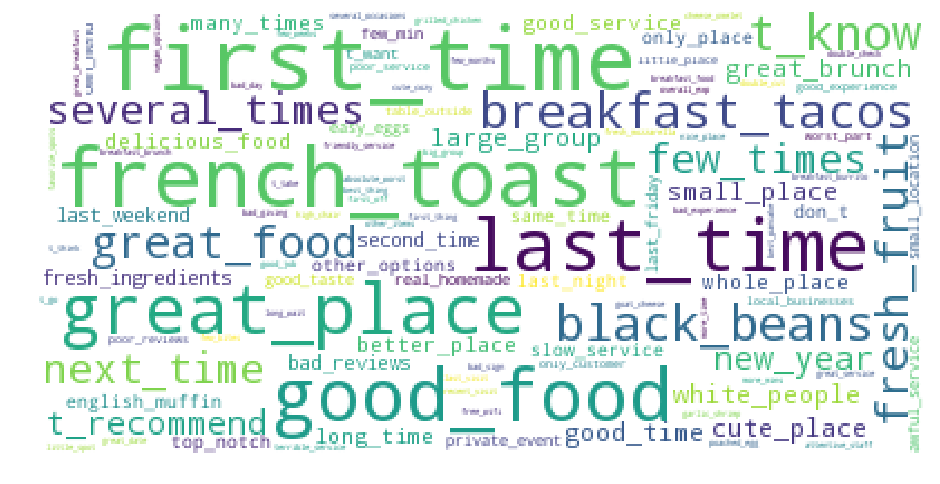

In [60]:
stopwords = set(STOPWORDS)
data = my_review

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(s1)

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)